In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [162]:
cwd=os.getcwd()
data_vehicles_path=os.path.join(cwd,"data_vehicles_french.csv")
data_vehicles_2013_2021 = pd.read_csv(data_vehicles_path, low_memory=False).fillna(0)


In [3]:
repartitionvehiculesneufs_path = os.path.join(cwd,"sect-ind-auto-immat-energie.xlsx")
repartitionvehiculesneufs = pd.read_excel(repartitionvehiculesneufs_path,header=3,)

In [4]:
repartitionvehiculesneufs = repartitionvehiculesneufs.loc[[0,1,2,3,4,5],:]

In [5]:
repartitionvehiculesneufs_2015_2021=repartitionvehiculesneufs[["Type d'énergie",2015,2021]]
repartitionvehiculesneufs_2015_2021

,Type d'énergie,2015,2021
0,Essence,739.374,669.928
1,Diesel,1097.122,349.479
2,Hybride1,61.617,430.899
3,Électricité,17.268,162.106
4,Bicarburation (essence + GPL + GNV),1.553,46.422
5,Autres2,0.288,0.170


0    0.385649
1    0.572246
2    0.032139
3    0.009007
4    0.000810
5    0.000150
Name: 2015, dtype: float64


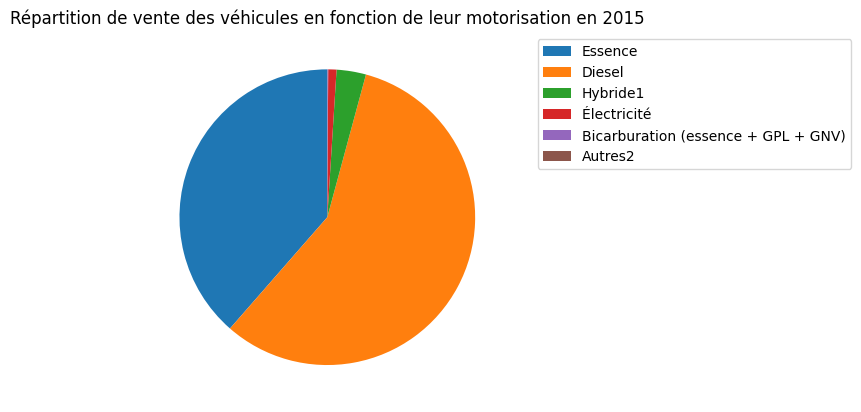

0    0.403813
1    0.210656
2    0.259734
3    0.097713
4    0.027982
5    0.000102
Name: 2021, dtype: float64


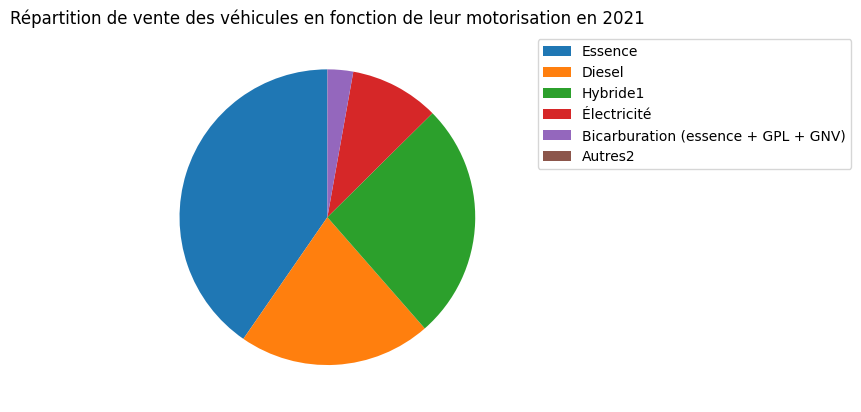

In [223]:
#répartition de vente des véhicules en fonction de leur motorisation

year=[2015,2021]
for i in year:
    data=repartitionvehiculesneufs[["Type d'énergie",i]]
    plt.pie( data.loc[:,i], labels= data.loc[:,"Type d'énergie"], autopct=None, startangle=90, labeldistance=None)
    val_legende=data.loc[:,i]/(sum(data.loc[:,i]))
    print(val_legende)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('Répartition de vente des véhicules en fonction de leur motorisation en {}'.format(i))
    plt.show()

In [94]:
data_vehicles_2013_2021.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [138]:
#on garde seulement les colonnes qui nous intéressent
data_vehicles_final=data_vehicles_2013_2021.loc[:,['Mh','Cn','year','Ft','m (kg)','Enedc (g/km)','Ewltp (g/km)','Electric range (km)','Fuel consumption ']].drop_duplicates(subset='Cn',keep='first').sort_values('year',ascending=True) 
#on reshape les data (pour uniformiser les catégories)
data_vehicles_final = data_vehicles_final[data_vehicles_final['Mh']!='PSA']
data_vehicles_final = data_vehicles_final[data_vehicles_final['Ft']!=0]
data_vehicles_final['Ft']=data_vehicles_final['Ft'].apply(lambda x : x.lower())

data_vehicles_final.head(-10)

,Mh,Cn,year,Ft,m (kg),Enedc (g/km),Ewltp (g/km),Electric range (km),Fuel consumption
0,RENAULT,CLIO,2013,petrol,1062.0,135.0,0.0,0.0,0.0
24187,AUTOMOBILES CITROEN,DS4 / 1.6 / HDI AUT.,2013,diesel,1375.0,114.0,0.0,0.0,0.0
24181,AUTOMOBILES CITROEN,DS4 / 1.6 / HDI,2013,diesel,1370.0,113.0,0.0,0.0,0.0
24180,AUTOMOBILES CITROEN,DS3 RACING / 1.6 / 16V TURBO,2013,petrol,1240.0,149.0,0.0,0.0,0.0
24178,AUTOMOBILES CITROEN,DS3 / 1.6 / 16V TURBO,2013,petrol,1165.0,135.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
313092,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 2.0 / HDI L2,2021,diesel,1793.0,0.0,183.0,0.0,7.0
313088,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 2.0 / AUT.HDI L2,2021,diesel,1839.0,0.0,186.0,0.0,7.1
313077,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 1.5 / HDI L2,2021,diesel,1734.0,0.0,167.0,0.0,6.4
312954,AUTOMOBILES CITROEN,C4 SPACETOURER / 2.0 / HDI AUT.,2021,diesel,1615.0,0.0,160.0,0.0,6.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


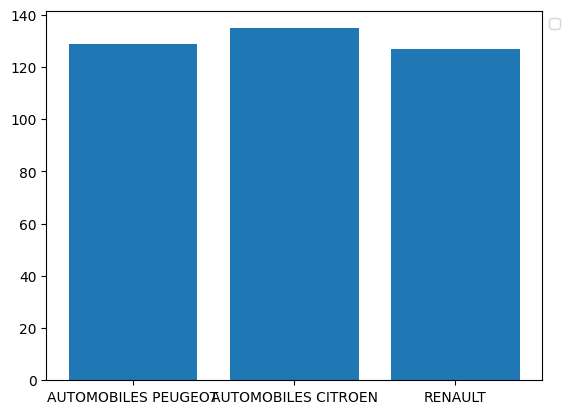

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


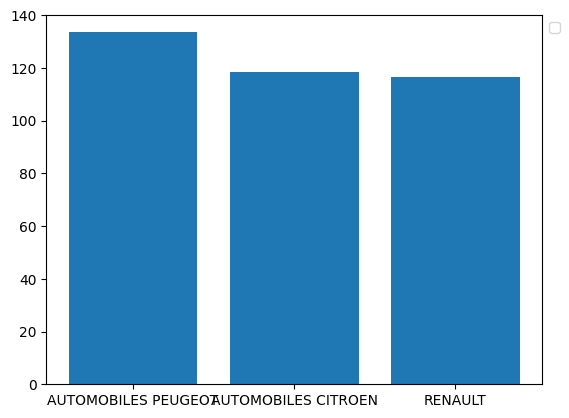

In [180]:
data_vehicles_constr = data_vehicles_final.loc[:,['Mh','year','Enedc (g/km)', 'Ewltp (g/km)']].groupby(['year','Mh'])
data_emission_mean = data_vehicles_constr.mean() #on construit le dataframe de la valeur moyenne des émissions
constr=list(set(data_vehicles_final['Mh'])) #on récupère la liste des constructeurs
year=[2013,2021]
for i in range(len(year)):
    data_emission=data_emission_mean.loc[data_emission_mean.index[[3*i,3*i+1,3*i+2]]]
    if i==0:
        values='Enedc (g/km)' #type de controle qui a changé
    elif i==1:
        values = 'Ewltp (g/km)' #type de controle qui a changé
    plt.bar(constr, data_emission[values])
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
        


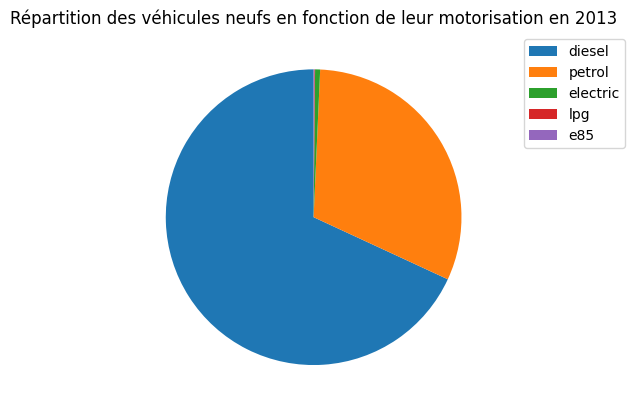

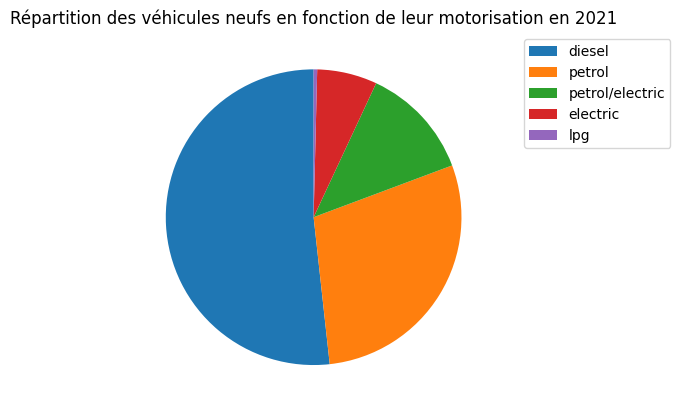

In [164]:
#affichage de la répartition des véhicules neufs dévéloppés par les constructeurs français

year=[2013,2021]
for i in range(len(year)):
    data=data_vehicles_final[data_vehicles_final["year"]==year[i]]
    compt_ft=data['Ft'].value_counts()
    plt.pie(compt_ft.values, labels=compt_ft.index, startangle=90,labeldistance=None)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('Répartition des véhicules neufs en fonction de leur motorisation en {}'.format(year[i]))
    plt.show()

In [ ]:
#on analyse l'évolution des émissions de CO2 des véhicules par constructeur



